# Taller 1

## Integrantes:

* Juan Sebastián Libreros García
* Pablo Guzmán

# Contexto

Usted hace parte del equipo de analítica de datos del Sunderland AFC de la segunda división inglesa. Se les ha encomendado trabajar en un proyecto sobre reclutar jugadores (scouting). Para ello, cuenta con una base de datos del videojuego FIFA que cuenta con información real de 22,080 jugadores a nivel mundial, recolectada en febrero de 2023. Esta información es confiable dado que dicha empresa cuenta con más de 6 mil scouts alrededor del mundo quienes realizan permanentes evaluaciones sobre el desempeño de los jugadores.

# Problema 

Su jefe le ha pedido una descripción de la base de datos, para conocer mejor cómo pueden trabajar con ella. La base de datos cuenta con una pestaña donde está el diccionario de variables. Tenga en cuenta esta información para poder entender los datos.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# Desarrollo

In [18]:
players = pd.read_csv('base_taller.csv', sep=';')

El archivo es un `.csv` que está separado por punto y coma (;) por eso se añadió el parametro `sep` en la lectura del archivo

In [19]:
players.head()

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,pref_foot,weak_foot,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall
0,231747,Kylian Mbappé Lottin,23,France,182,161,ST,91,95,"190,5",Right,4,5,4,High,Low,Unique,France,Paris Saint Germain,84
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,"107,5",Right,5,4,4,High,Medium,Unique,England,Manchester City,85
2,188545,Robert Lewandowski,33,Poland,185,179,ST,91,91,84,Right,4,4,5,High,Medium,Unique,Spain,Fc Barcelona,83
3,165153,Karim Benzema,34,France,185,179,CF,91,91,64,Right,4,4,4,Medium,Medium,Normal (170-185),Spain,Real Madrid,85
4,158023,Lionel Andrés Messi Cuccittini,35,Argentina,169,148,RW,91,91,54,Left,4,4,5,Low,Low,Unique,France,Paris Saint Germain,84


In [20]:
players.shape

(22080, 20)

El dataframe tiene 22080 registros y 20 atributos

In [21]:
players.isna().sum()

player_id                   0
player_name                 0
age                         0
country                     0
height_cm                   0
weight_lbs                  0
position                    0
overall                     0
potential                   0
Value_millions              0
pref_foot                   0
weak_foot                   0
skill_moves                 0
international_reputation    0
Attacking_work_rate         0
Defensive_work_rate         0
body_type                   0
club_country                0
club_name                   0
club_overall                0
dtype: int64

No hay datos nulos en el dataframe

#### 1. ¿Qué tipo de variable es cada una de las columnas? (recuerde responder según las 4 clasificaciones vistas en clase).

In [22]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22080 entries, 0 to 22079
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   player_id                 22080 non-null  int64 
 1   player_name               22080 non-null  object
 2   age                       22080 non-null  int64 
 3   country                   22080 non-null  object
 4   height_cm                 22080 non-null  int64 
 5   weight_lbs                22080 non-null  int64 
 6   position                  22080 non-null  object
 7   overall                   22080 non-null  int64 
 8   potential                 22080 non-null  int64 
 9   Value_millions            22080 non-null  object
 10  pref_foot                 22080 non-null  object
 11  weak_foot                 22080 non-null  int64 
 12  skill_moves               22080 non-null  int64 
 13  international_reputation  22080 non-null  int64 
 14  Attacking_work_rate   

| Atributo                    | Tipo de variable                | Justificación                                                                 |
|----------------------------|----------------------------------|-------------------------------------------------------------------------------|
| player_id                  | Numérica discreta                | Identificador único, valores enteros sin decimales                            |
| player_name                | Categórica nominal               | Nombres de jugadores, no existe orden                                         |
| age                        | Numérica discreta                | Edad en años, valores enteros                                                 |
| country                    | Categórica nominal               | País de origen, no existe orden                                               |
| height_cm                  | Numérica continua                | Estatura en cm, puede tomar cualquier valor dentro de un rango                |
| weight_lbs                 | Numérica continua                | Peso en libras, puede tomar cualquier valor dentro de un rango                |
| position                   | Categórica nominal               | Posición en el campo, no existe orden                                         |
| overall                    | Numérica discreta                | Puntaje entero de desempeño                                                   |
| potential                  | Numérica discreta                | Puntaje entero de potencial                                                   |
| Value_millions             | Numérica continua                | Valor en millones, puede tomar decimales                                      |
| pref_foot                  | Categórica nominal               | Pie preferido, no existe orden                                                |
| weak_foot                  | Numérica discreta                | Puntaje entero de habilidad con pie débil                                     |
| skill_moves                | Numérica discreta                | Puntaje entero de habilidad técnica                                           |
| international_reputation   | Numérica discreta                | Puntaje entero de reputación internacional                                    |
| Attacking_work_rate        | Categórica ordinal               | Nivel de esfuerzo ofensivo (Low, Medium, High), existe orden                  |
| Defensive_work_rate        | Categórica ordinal               | Nivel de esfuerzo defensivo (Low, Medium, High), existe orden                 |
| body_type                  | Categórica nominal               | Tipo de cuerpo, no existe orden                                               |
| club_country               | Categórica nominal               | País del club, no existe orden                                                |
| club_name                  | Categórica nominal               | Nombre del club, no existe orden                                              |
| club_overall               | Numérica discreta                | Puntaje entero de desempeño del club                                          |

---------------------------------------------------------------------------------------------------------------------------------------

#### 2. Realice un completo análisis descriptivo de las columnas que vamos a utilizar:

a) Age
b) height_cm
c) position
d) club_country
e) overall
f) club_overall
g) value_millions
h) pref_foot

Estadísticas descriptivas (numéricas):


,count,mean,std,min,5%,25%,50%,75%,95%,max,missing,skew
age,22080.0,24.894112,4.891117,16.0,18.0,21.0,24.0,28.0,34.0,44.0,0,0.433130
height_cm,22080.0,181.391893,6.852274,155.0,170.0,176.0,181.0,186.0,193.0,206.0,0,-0.021495
overall,22080.0,65.223958,6.804443,46.0,53.0,61.0,65.0,70.0,76.0,91.0,0,0.061984
club_overall,22080.0,68.295743,5.358555,0.0,61.0,65.0,68.0,71.0,78.0,85.0,0,-1.233215
value_millions,2165.0,8.146420,13.107803,0.0,0.0,1.0,3.0,9.0,32.8,160.0,19915,3.711950


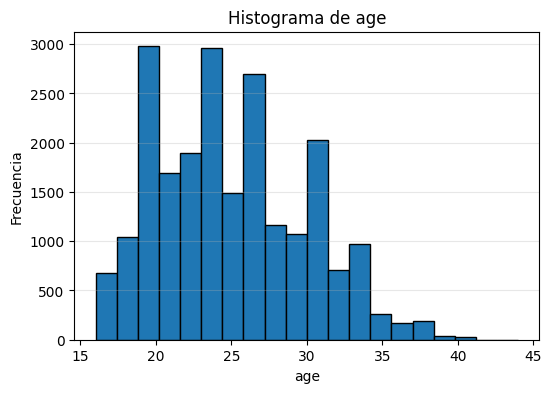

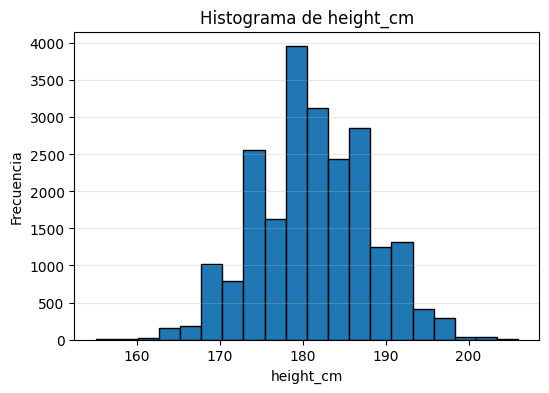

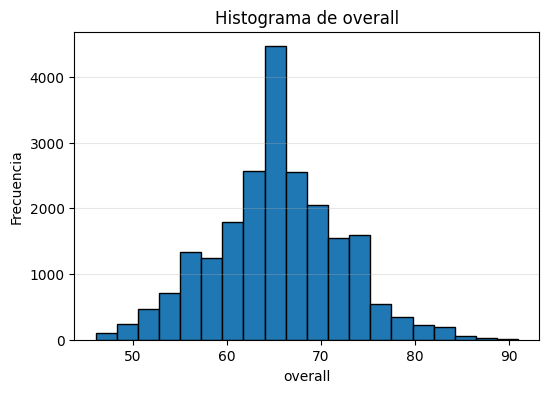

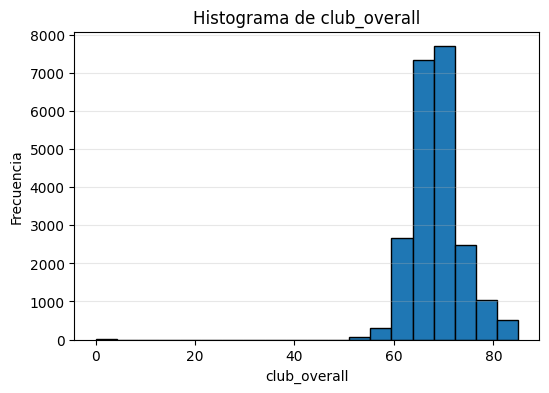

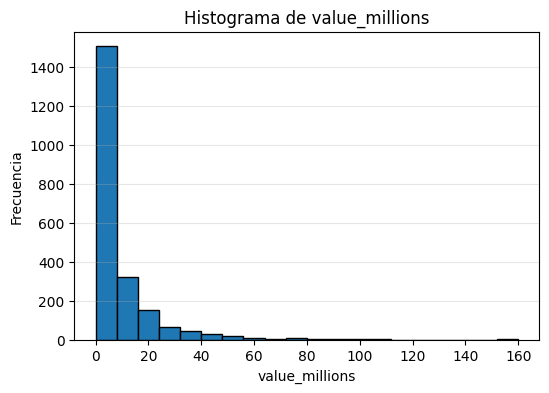

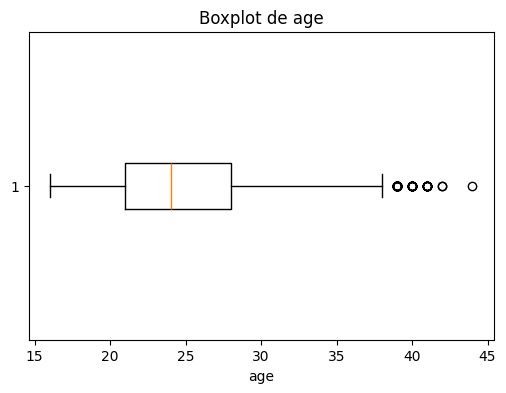

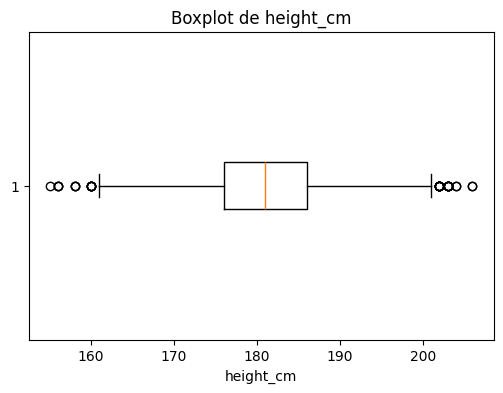

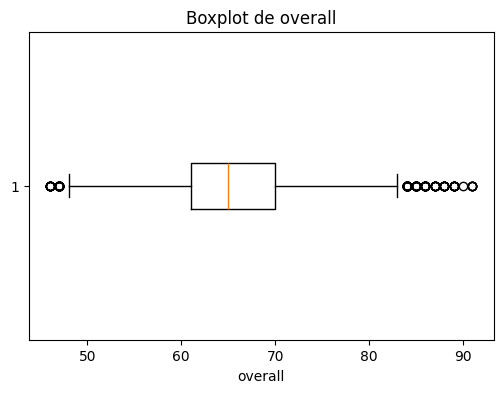

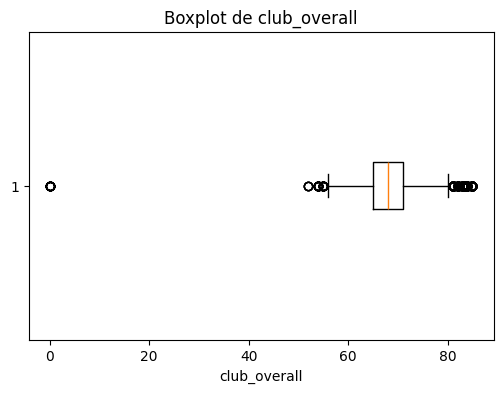

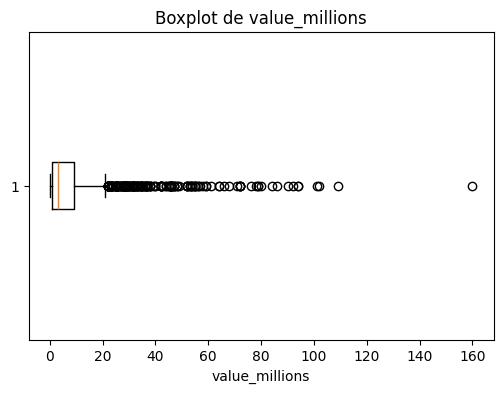


 Frecuencias de position:


,freq,share
position,,
CB,3876,0.176
ST,3113,0.141
CM,2590,0.117
GK,2430,0.110
CDM,1829,0.083
RB,1416,0.064
LB,1379,0.062
CAM,1267,0.057
RM,1145,0.052


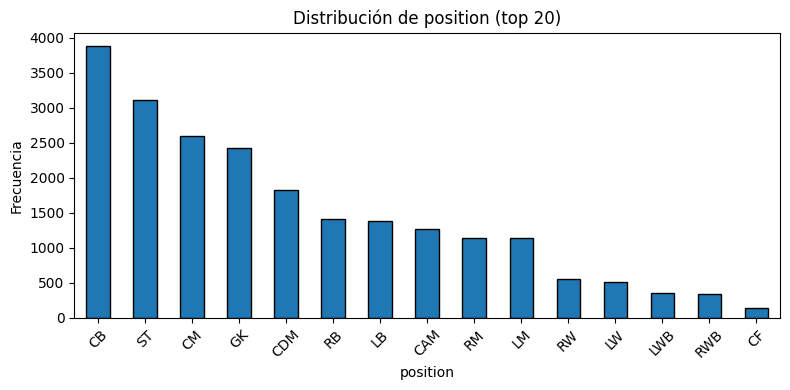


 Frecuencias de club_country:


,freq,share
club_country,,
England,2741,0.124
Germany,1700,0.077
Spain,1355,0.061
Italy,1178,0.053
France,1167,0.053
Argentina,949,0.043
United States,832,0.038
China PR,600,0.027
Portugal,576,0.026


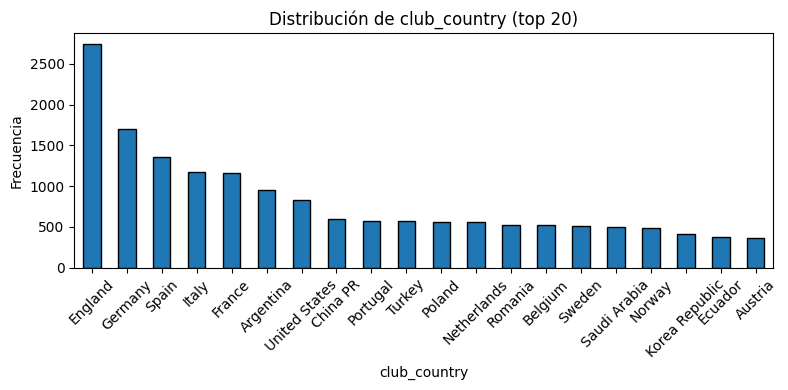


 Frecuencias de pref_foot:


,freq,share
pref_foot,,
Right,16733,0.758
Left,5347,0.242


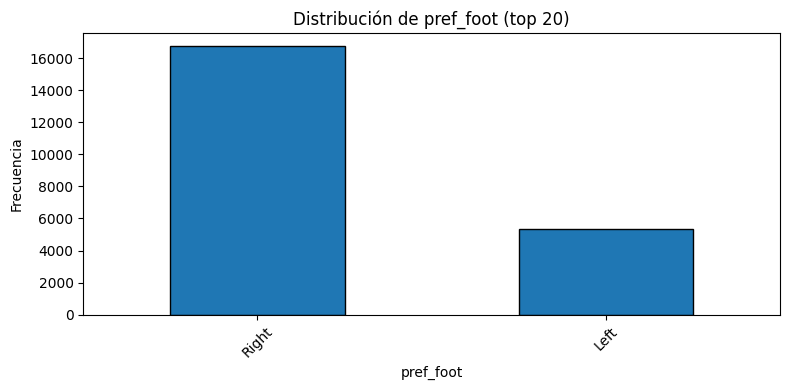

In [23]:
players.columns = players.columns.str.strip().str.lower()

numeric_cols = ['age', 'height_cm', 'overall', 'club_overall', 'value_millions']
categorical_cols = ['position', 'club_country', 'pref_foot']

for c in numeric_cols:
    players[c] = pd.to_numeric(players[c], errors='coerce')

print("Estadísticas descriptivas (numéricas):")
display(
    players[numeric_cols]
    .describe(percentiles=[.05,.25,.5,.75,.95])
    .T.assign(
        missing=players[numeric_cols].isna().sum(),
        skew=players[numeric_cols].skew()
    )
)

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(players[col].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col); plt.ylabel('Frecuencia'); plt.grid(axis='y', alpha=0.3)
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(players[col].dropna(), vert=False)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col); plt.show()

for col in categorical_cols:
    print(f"\n Frecuencias de {col}:")
    freq = players[col].value_counts(dropna=False)
    display(freq.to_frame('freq').assign(share=lambda df: (df['freq']/df['freq'].sum()).round(3)))

    plt.figure(figsize=(8,4))
    freq.head(20).plot(kind='bar', edgecolor='black')
    plt.title(f'Distribución de {col} (top 20)')
    plt.xlabel(col); plt.ylabel('Frecuencia'); plt.xticks(rotation=45); plt.tight_layout()
    plt.show()


Las variables numéricas (age, height_cm, overall, club_overall, value_millions) muestran distribuciones distintas: la edad se concentra entre 20 y 30 años; la altura se distribuye normalmente alrededor de 181 cm; las valoraciones (overall y club_overall) presentan concentraciones altas en rangos medios-altos, mientras que value_millions es asimétrica a la derecha, con pocos jugadores de valores muy altos. Los boxplots confirman la presencia de outliers, especialmente en value_millions.

Las variables categóricas (position, club_country, pref_foot) muestran una diversidad de categorías. En position, las más comunes son CB (defensa central), ST (delantero) y CM (centrocampista), mientras que pref_foot refleja una distribución esperada entre pie derecho e izquierdo.

-----------------------------------------------------------------------------------

#### 3. Un miembro del cuerpo técnico asegura que los arqueros (GK) altos tienen un mejor desempeño (overall). ¿Qué puede afirmar usted a través de un análisis descriptivo? (Nota: tome por definición tres grupos de estatura: i) menor a 185 cm; ii) entre 185 y 192 cm; iii) más de 192 cm)

In [24]:
goalKeepers = players[players['position'] == 'GK']
goalKeepers = goalKeepers[['position', 'overall', 'height_cm',]]

In [25]:
goalKeepers_under_185 = goalKeepers[goalKeepers['height_cm'] < 185]
goalKeepers_between_185_and_192 = goalKeepers[(goalKeepers['height_cm'] >= 185) & (goalKeepers['height_cm'] <= 192)]
goalKeepers_over_192 = goalKeepers[goalKeepers['height_cm'] > 192]

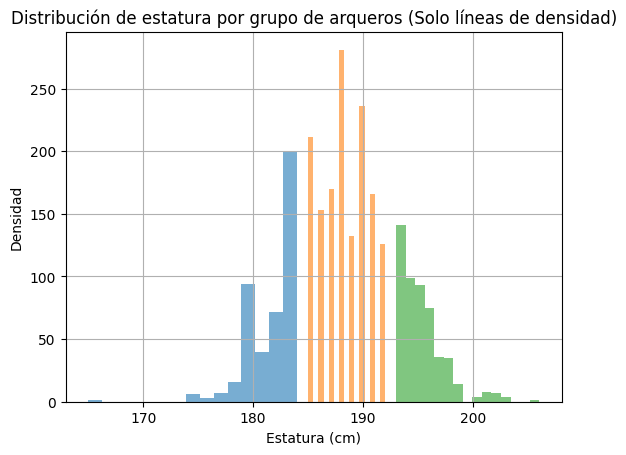

In [26]:
plt.hist(goalKeepers_under_185['height_cm'], bins=15, alpha=0.6,  label='Menor a 185 cm')
plt.hist(goalKeepers_between_185_and_192['height_cm'], bins=15, alpha=0.6, label='185-192 cm')
plt.hist(goalKeepers_over_192['height_cm'], bins=15, alpha=0.6, label='Más de 192 cm')
plt.xlabel('Estatura (cm)')
plt.ylabel('Densidad')
plt.title('Distribución de estatura por grupo de arqueros (Solo líneas de densidad)')
plt.grid()
plt.show()


In [27]:
print("Arqueros con estatura menor a 185 cm:")
print(goalKeepers_under_185['overall'].describe())

print("\nArqueros con estatura entre 185 y 192 cm:")
print(goalKeepers_between_185_and_192['overall'].describe())

print("\nArqueros con estatura mayor a 192 cm:")
print(goalKeepers_over_192['overall'].describe())

Arqueros con estatura menor a 185 cm:
count    438.000000
mean      62.086758
std        7.177180
min       48.000000
25%       57.000000
50%       62.000000
75%       67.000000
max       86.000000
Name: overall, dtype: float64

Arqueros con estatura entre 185 y 192 cm:
count    1475.000000
mean       64.141017
std         7.379823
min        46.000000
25%        59.000000
50%        64.000000
75%        69.000000
max        89.000000
Name: overall, dtype: float64

Arqueros con estatura mayor a 192 cm:
count    517.000000
mean      64.746615
std        7.639378
min       48.000000
25%       60.000000
50%       64.000000
75%       70.000000
max       90.000000
Name: overall, dtype: float64


Aqui podemos evidenciar que los jugadores entre más crece su altura el overall no necesariamente crece, ya que como podemos ver, los tres grupos cuentan con un overall de alrededor de 62-64, lo que implica que la altura no es un factor muy importante para el desempeño del portero.

--------------------------------------------------------------------------------------

#### 4. Un analista afirma que los jugadores zurdos, tienen un mejor desempeño (overall) que los diestros. ¿Qué puede decir sobre esta afirmación a través de un análisis descriptivo?

In [28]:
players.groupby('pref_foot')['overall'].describe()

,count,mean,std,min,25%,50%,75%,max
pref_foot,,,,,,,,
Left,5347.0,65.766037,6.548680,46.0,62.0,66.0,70.0,91.0
Right,16733.0,65.050738,6.875354,46.0,61.0,65.0,69.0,91.0


Al comparar la calificación global (overall) entre jugadores zurdos y diestros, se observa que los zurdos (n = 5,347) tienen un promedio de 65.77, mientras que los diestros (n = 16,733) registran un promedio de 65.05. La mediana es de 66 para zurdos y 65 para diestros, lo que indica una ligera ventaja de un punto para el grupo de pie izquierdo.

La desviación estándar es similar en ambos casos (6.55 para zurdos y 6.87 para diestros), lo que sugiere una dispersión comparable en los puntajes de rendimiento. El rango de valores es idéntico, con mínimos de 46 y máximos de 91 en ambos grupos.

En términos descriptivos, los datos respaldan parcialmente la afirmación de que los jugadores zurdos presentan un mejor desempeño, aunque la diferencia es pequeña y podría no ser estadísticamente significativa sin un análisis inferencial adicional.

---------------------------------------------------------------------------------------------------

#### 5. Un scout asegura que los mejores jugadores, según el puntaje de desempeño (overall), juegan en clubes que pertenecen al grupo de “ligas top5” (Inglaterra, España, Alemania, Italia y Francia). ¿Qué puede decir sobre estas dos afirmaciones a través de un análisis descriptivo?

In [29]:
top5_countries = ['England', 'Spain', 'Germany', 'Italy', 'France']

players_top5 = players[players['club_country'].isin(top5_countries)]
players_other = players[~players['club_country'].isin(top5_countries)]

print("=== ANÁLISIS DESCRIPTIVO: LIGAS TOP5 VS OTRAS LIGAS ===\n")

print("1. ESTADÍSTICAS DESCRIPTIVAS DEL OVERALL:")
print("\nJugadores en ligas TOP5:")
print(players_top5['overall'].describe())

print("\nJugadores en otras ligas:")
print(players_other['overall'].describe())

mean_top5 = players_top5['overall'].mean()
mean_other = players_other['overall'].mean()
print(f"\n2. COMPARACIÓN DE MEDIAS:")
print(f"Media overall ligas TOP5: {mean_top5:.2f}")
print(f"Media overall otras ligas: {mean_other:.2f}")
print(f"Diferencia: {mean_top5 - mean_other:.2f} puntos")

print(f"\n3. DISTRIBUCIÓN POR RANGOS DE OVERALL:")

bins = [0, 60, 70, 80, 90, 100]
labels = ['Bajo (0-60)', 'Medio (60-70)', 'Bueno (70-80)', 'Muy Bueno (80-90)', 'Élite (90-100)']

players_top5_ranges = pd.cut(players_top5['overall'], bins=bins, labels=labels, right=False)
players_other_ranges = pd.cut(players_other['overall'], bins=bins, labels=labels, right=False)

top5_counts = players_top5_ranges.value_counts().sort_index()
other_counts = players_other_ranges.value_counts().sort_index()

top5_percentages = (top5_counts / len(players_top5) * 100)
other_percentages = (other_counts / len(players_other) * 100)

print("\nLigas TOP5:")
for i, label in enumerate(labels):
    print(f"{label}: {top5_counts.iloc[i]} jugadores ({top5_percentages.iloc[i]:.1f}%)")

print("\nOtras ligas:")
for i, label in enumerate(labels):
    print(f"{label}: {other_counts.iloc[i]} jugadores ({other_percentages.iloc[i]:.1f}%)")

best_players_top5 = players_top5[players_top5['overall'] >= 85]
best_players_other = players_other[players_other['overall'] >= 85]

total_best = len(players[players['overall'] >= 85])
pct_best_top5 = len(best_players_top5) / total_best * 100
pct_best_other = len(best_players_other) / total_best * 100

print(f"\n4. ANÁLISIS DE LOS MEJORES JUGADORES (Overall ≥ 85):")
print(f"Total de jugadores élite: {total_best}")
print(f"En ligas TOP5: {len(best_players_top5)} ({pct_best_top5:.1f}%)")
print(f"En otras ligas: {len(best_players_other)} ({pct_best_other:.1f}%)")

total_players = len(players)
pct_players_top5 = len(players_top5) / total_players * 100
pct_players_other = len(players_other) / total_players * 100

print(f"\n5. DISTRIBUCIÓN GENERAL DE JUGADORES:")
print(f"Jugadores en ligas TOP5: {len(players_top5)} ({pct_players_top5:.1f}%)")
print(f"Jugadores en otras ligas: {len(players_other)} ({pct_players_other:.1f}%)")

=== ANÁLISIS DESCRIPTIVO: LIGAS TOP5 VS OTRAS LIGAS ===

1. ESTADÍSTICAS DESCRIPTIVAS DEL OVERALL:

Jugadores en ligas TOP5:
count    8141.000000
mean       66.844122
std         7.268095
min        48.000000
25%        62.000000
50%        66.000000
75%        72.000000
max        91.000000
Name: overall, dtype: float64

Jugadores en otras ligas:
count    13939.000000
mean        64.277710
std          6.329658
min         46.000000
25%         60.000000
50%         65.000000
75%         68.000000
max         87.000000
Name: overall, dtype: float64

2. COMPARACIÓN DE MEDIAS:
Media overall ligas TOP5: 66.84
Media overall otras ligas: 64.28
Diferencia: 2.57 puntos

3. DISTRIBUCIÓN POR RANGOS DE OVERALL:

Ligas TOP5:
Bajo (0-60): 1181 jugadores (14.5%)
Medio (60-70): 4184 jugadores (51.4%)
Bueno (70-80): 2352 jugadores (28.9%)
Muy Bueno (80-90): 418 jugadores (5.1%)
Élite (90-100): 6 jugadores (0.1%)

Otras ligas:
Bajo (0-60): 2931 jugadores (21.0%)
Medio (60-70): 8262 jugadores (59.3%)


Se puede evidenciar que los jugadores con mejor overall ( $>=85%$ ) están claramente concentrados en las ligas TOP5, se puede evidenciar sobretodo en la distribución de los jugadores, esto es que 424 jugadores con un overall mayor a 80 se encuentran en las ligas Top5, eso contra los 79 que solo llegan hasta 90. Por lo que se peude concluir que el scout tenía razón

----------------------------------------------------------------------------------------

#### 6. Otro scout asegura que la proporción de jugadores zurdos es mayor en la posición de centro campista (CM) que en la de centro campista ofensivo (CAM). ¿Qué puede decir sobre esta afirmación?

In [30]:
subset = players[players['position'].isin(['CM', 'CAM'])]

proportion_left = (
    subset.groupby('position')['pref_foot']
    .apply(lambda x: (x == 'Left').mean())
    .reset_index(name='proportion_left')
)
print(proportion_left)
counts = subset.groupby(['position', 'pref_foot']).size().unstack(fill_value=0)
print(counts)


  position  proportion_left
0      CAM         0.278611
1       CM         0.185714
pref_foot  Left  Right
position              
CAM         353    914
CM          481   2109


Analizando la distribución del pie preferido en las posiciones de centro campista (CM) y centro campista ofensivo (CAM), se obtiene que en la posición CAM, el 27.86% de los jugadores son zurdos (353 de 1,267 jugadores) y en la posición CM, el 18.57% son zurdos (481 de 2,590 jugadores).

Esto indica que la proporción de zurdos es mayor en la posición de CAM que en CM, lo contrario a lo afirmado por el scout. Aunque ambas posiciones tienen mayoría de jugadores diestros, los datos muestran que los centro campistas ofensivos tienen casi 9 puntos porcentuales más de presencia de zurdos que los centro campistas tradicionales.

-------------------------------------------------------------------------------------------------------------------

#### 7. Otro scout asegura que los mejores jugadores juegan en los mejores clubes del mundo ¿Es cierta esta afirmación de que existe una correlación entre el desempeño de los jugadores (overall) y el puntaje de desempeño del club al que pertenece (club_overall)?

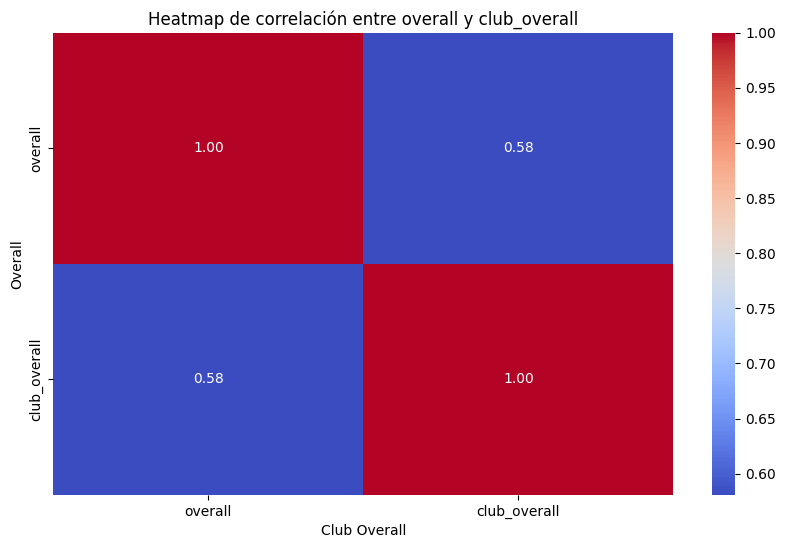

In [31]:
players_copy = players.copy()
players_copy = players_copy[['overall','club_overall']]
overall_corr = players_copy.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(overall_corr,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de correlación entre overall y club_overall')
plt.xlabel('Club Overall')
plt.ylabel('Overall')
plt.show()

Como se puede ver lo que dice el scout no es necesariamente cierto debido a que en esta matriz de correlación se puede evidenciar que la misam no es muy alta por lo que se podía afirmar que existe una correlación positiva que, sin embargo, no es muy fuerte. Así se concluye que no necesariamente los mejores jugadores están en lso mejores clubes